#### Progetto Finale 'fetal_healt' -  Francesco Laporta | Neural Academy

#### Introduzione:
###### Il nostro progetto si concentra sulla progettazione e sviluppo di un modello predittivo innovativo per la diagnostica dei casi normali, patologici e sospetti utilizzando dati derivanti dalla cardiotocografia (CTG). La CTG è una tecnica di monitoraggio non invasiva che fornisce informazioni preziose sulla salute fetale durante la gravidanza. Il nostro obiettivo è creare un sistema intelligente che, basandosi su dati CTG, possa aiutare gli operatori sanitari nella diagnosi precoce e accurata delle condizioni fetali.

#### Metodologia:
###### Per la realizzazione del nostro modello predittivo, abbiamo raccolto una vasta quantità di dati CTG provenienti da casi normali, patologici e sospetti. Abbiamo considerato diverse variabili, tra cui frequenza cardiaca fetale, variazioni del battito cardiaco, movimenti fetali e contrazioni uterine. Successivamente, abbiamo utilizzato algoritmi di machine learning avanzati per analizzare e identificare pattern significativi all'interno dei dati.

##### Sviluppo del modello:
###### La fase di sviluppo del modello ha comportato l'addestramento di algoritmi di machine learning e alberi decisionali, utilizzando i dati CTG etichettati in base alle diagnosi effettuate dai medici esperti. Durante l'addestramento, il modello ha imparato a riconoscere correlazioni e tendenze nei dati per effettuare previsioni accurate.

##### Validazione e valutazione:
###### Per garantire l'affidabilità e la precisione del nostro modello predittivo, abbiamo utilizzato tecniche di validazione incrociata e di test su dati indipendenti. Abbiamo confrontato le previsioni del nostro modello con le diagnosi effettuate dai medici esperti e valutato le prestazioni del modello in termini di accuratezza, sensibilità e specificità.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.preprocessing import RobustScaler


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df= pd.read_csv('fetal_health.csv') 
pd.set_option('display.max_columns', None)

##### Parallelamente alla nozione di mortalità infantile c'è ovviamente la mortalità materna, che rappresenta 295.000 decessi durante e dopo la gravidanza e il parto (a partire dal 2017).
###### In genere il primo monitoraggio con il cardiotocografico viene eseguito intorno 38a settimana di gestazione assieme agli altri esami che si effettuano di routine in vista del parto (emocromo, elettrocardiogramma, controllo della pressione arteriosa, etc.), e si ripete periodicamente dalla 40a settimana fino al termine, con maggiore frequenza.

#### Individuiamo le feature da mantenere nel dataset  attraverso una tecnica di selezione delle caratteristiche che utilizza criteri di valutazione per identificare le migliori k caratteristiche

In [4]:
X_fs=df.drop(["fetal_health"],axis=1)
y_fs=df["fetal_health"]
X=df.drop(["fetal_health"],axis=1)
y=df["fetal_health"]

X_fs.head()
columns_name = X_fs.columns.tolist()
scaler = StandardScaler()

# Adattamento e trasformazione dei dati
X_st = scaler.fit_transform(X_fs)

X_def = pd.DataFrame(data = X_st, columns= columns_name)
#spliting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X_def, y_fs, test_size=0.4, random_state=42, stratify=y_fs)

In [5]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

def feature_selection(n_best_ft, Xtr, ytr, Xtest):
    ft = SelectKBest(f_classif, k=n_best_ft).fit(Xtr, ytr)
    scores_df = pd.DataFrame(ft.scores_)
    columns_df = pd.DataFrame(Xtr.columns)
    ft_scores = pd.concat([columns_df, scores_df], axis=1)
    ft_scores.columns = ['X_feature', 'Score']
    ft_scores = ft_scores.sort_values('Score', ascending=False)
    best_features = ft_scores.head(n_best_ft).reset_index(drop=True)
    Xtr_fs = ft.transform(Xtr)
    Xtest_fs = ft.transform(Xtest)
    return best_features, Xtr_fs, Xtest_fs


In [6]:
best_ft, X_train_fs, X_test_fs = feature_selection(21, X_train, y_train, X_test)
best_ft

,X_feature,Score
0,prolongued_decelerations,348.921378
1,abnormal_short_term_variability,216.400952
2,percentage_of_time_with_abnormal_long_term_var...,195.768434
3,histogram_mean,182.645675
4,histogram_mode,161.795062
5,histogram_median,146.740926
6,accelerations,122.873887
7,histogram_variance,95.688300
8,mean_value_of_short_term_variability,75.595139
9,baseline value,70.531908


In [7]:
X=df.drop(["fetal_health",'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency'],axis=1)
y=df["fetal_health"]

X.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0


In [8]:
X.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0


In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   baseline value                   2126 non-null   float64
 1   accelerations                    2126 non-null   float64
 2   fetal_movement                   2126 non-null   float64
 3   uterine_contractions             2126 non-null   float64
 4   light_decelerations              2126 non-null   float64
 5   severe_decelerations             2126 non-null   float64
 6   prolongued_decelerations         2126 non-null   float64
 7   abnormal_short_term_variability  2126 non-null   float64
dtypes: float64(8)
memory usage: 133.0 KB


#### Nel nostro progetto, si è scelto di applicare il modello StandardScaler per le seguenti ragioni:

#### - Trasforma i dati in modo che abbiano una media di zero e una deviazione standard di uno.
#### - Risultato: i dati sono normalizzati e distribuiti intorno a zero, con una varianza unitaria.
#### - Utilizzo: adatto per algoritmi che richiedono dati standardizzati, come la regressione lineare, la regressione logistica e le SVM.

In [10]:
columns_name = X.columns.tolist()
scaler = StandardScaler()
# Inserire perché Standard Scaler Conclusioni oppure inserire RobustScaler in 
# Si è considerato di utilizzare il Robust scaler poiché utilizzando RobustScaler, 
#i valori anomali avranno meno impatto sulla trasformazione dei dati, consentendo di preservare 
# meglio la distribuzione relativa e di mantenere un peso preponderante su di essi.
# si è immaginato anche di utilizzare un Min Max poiché essendo dati clinici ci sono delle feature che 
# hanno una correlazione più importante
# Adattamento e trasformazione dei dati con Standard Scaler
X_st = scaler.fit_transform(X)

X_def = pd.DataFrame(data = X_st, columns= columns_name)
#spliting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X_def, y, test_size=0.4, random_state=42, stratify=y)
X_cv, X_test, y_cv, y_test = train_test_split(X_test, y_test, test_size=0.5, shuffle=True, stratify=y_test, random_state=42)

##### Nel contesto del nostro progetto, desideriamo presentare un'analisi visuale esaustiva della popolazione dei dati raccolti, suddivisa in base alle etichette assegnate. L'obiettivo principale di questa visualizzazione è fornire una rappresentazione chiara e immediata della distribuzione dei casi normali, patologici e sospetti all'interno del nostro dataset.


In [11]:
label_colors = {1.0: 'green', 2.0: 'yellow', 3.0: 'red'}

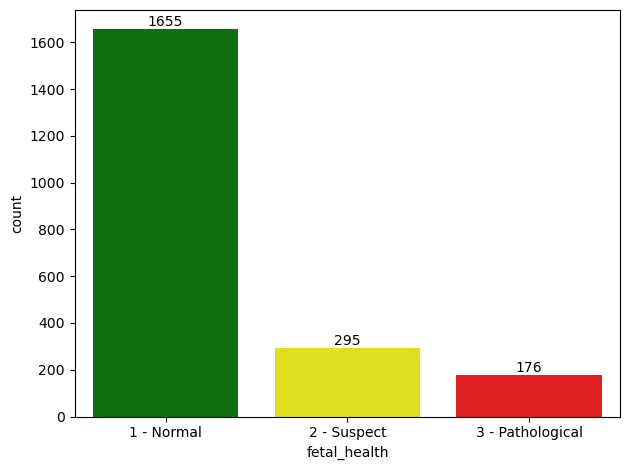

In [12]:
ax = sns.countplot(data=X, x=y, palette=label_colors)
ax.bar_label(ax.containers[0])

# Etichette personalizzate
valori_etichette = ['1 - Normal', '2 - Suspect', '3 - Pathological']
ax.set_xticklabels(valori_etichette)

plt.tight_layout()
plt.show()


##### L'obiettivo del grafico seguente è visualizzare la distribuzione dei punti nel diagramma di dispersione e la direzione della relazione tra 'accelerations' e 'fetal_movement' attraverso la linea di regressione lineare. Inoltre, i colori distinti rappresentano la classificazione della salute fetale (normali, patologiche o sospette), consentendo di osservare eventuali pattern o differenze tra le categorie.

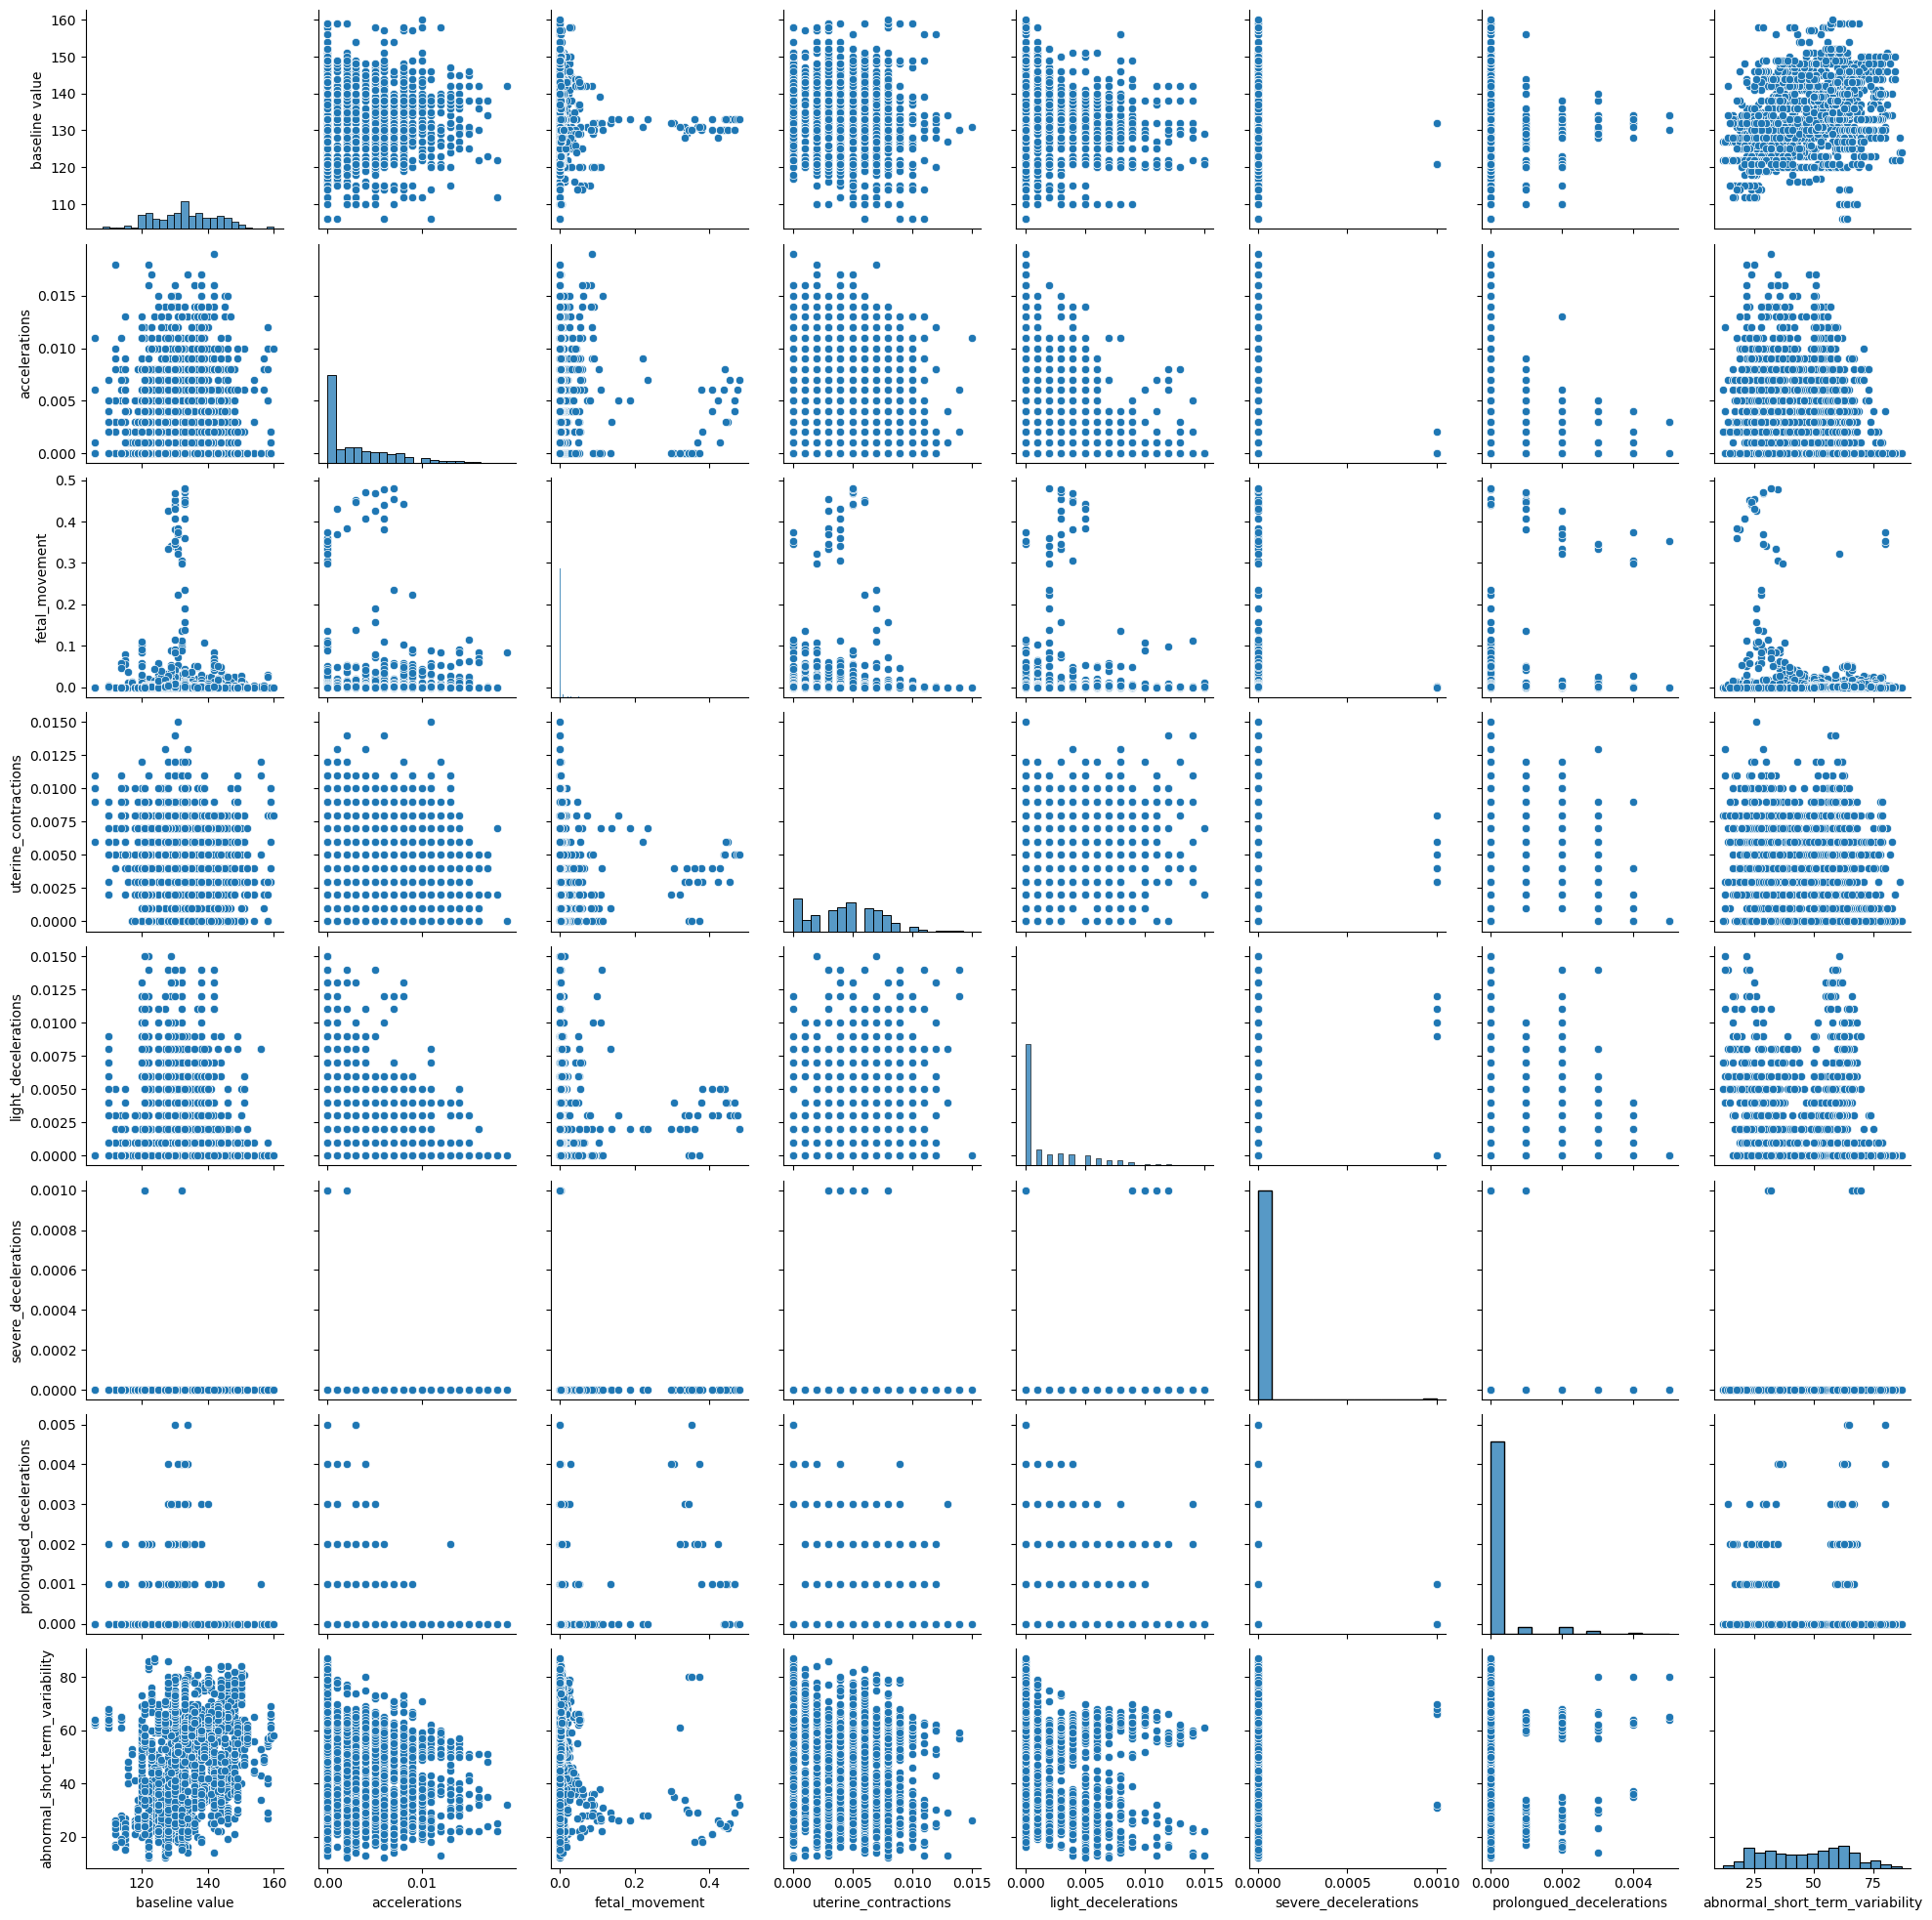

In [13]:
sns.pairplot(data=X)
plt.show()


In [14]:
# Costruiamo il nostro modello e scopriamo come sono distribuite le nostre feature

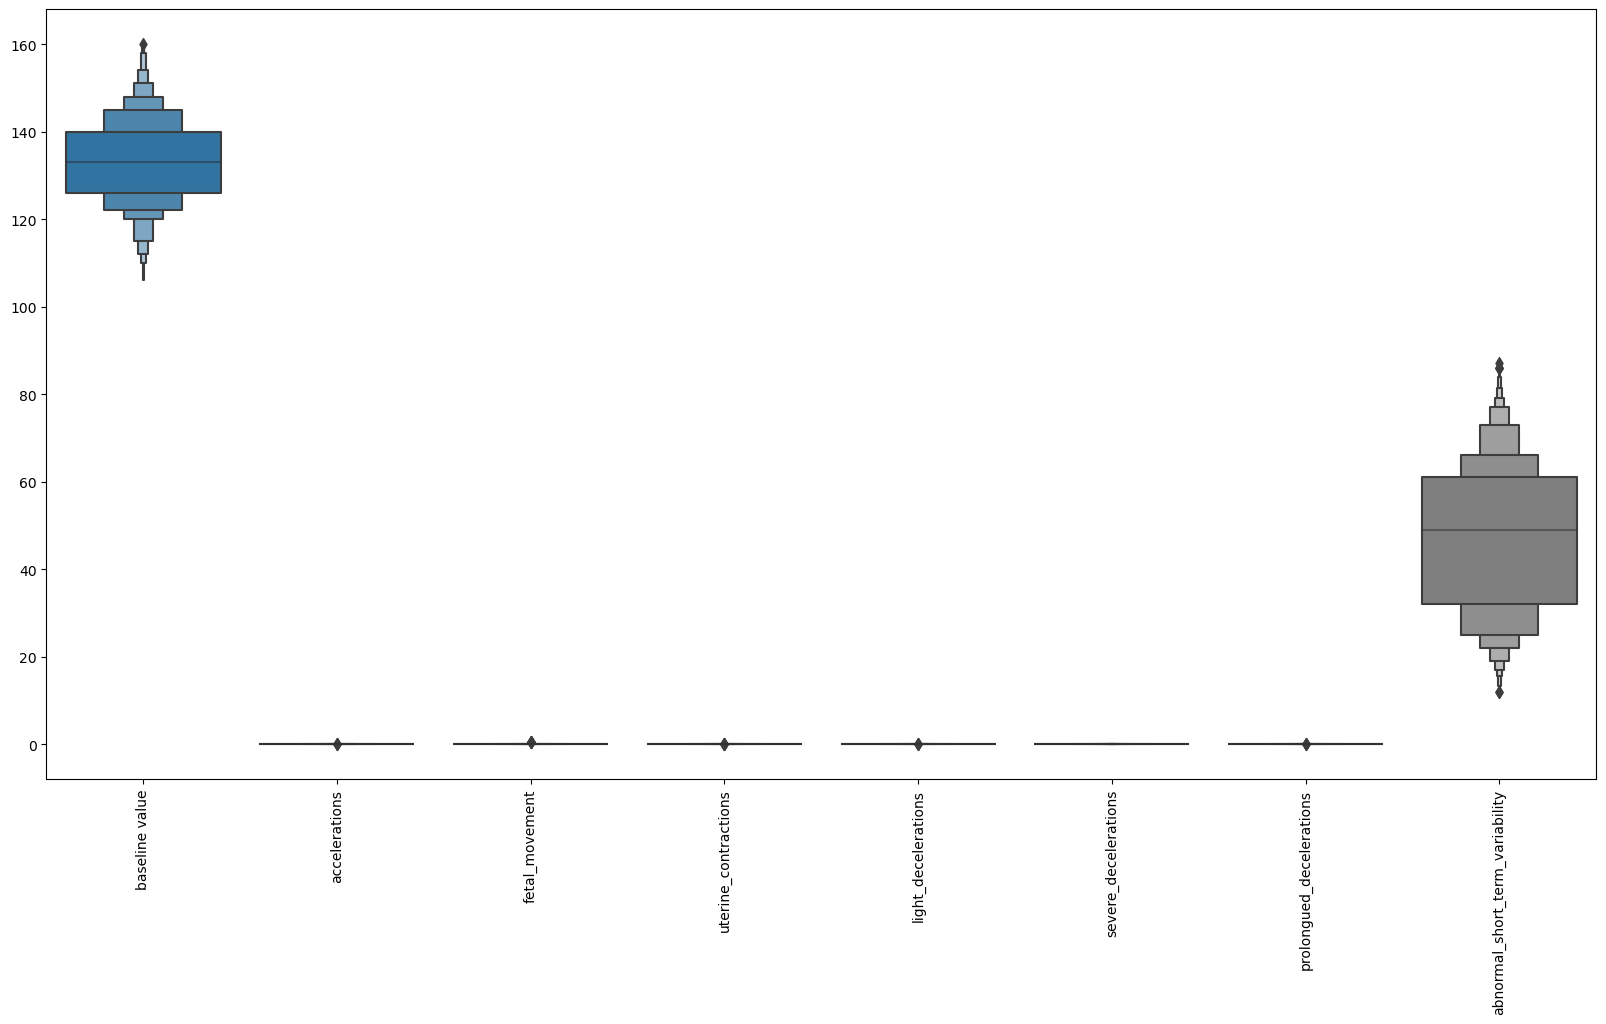

In [15]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = X)
plt.xticks(rotation=90)
plt.show()

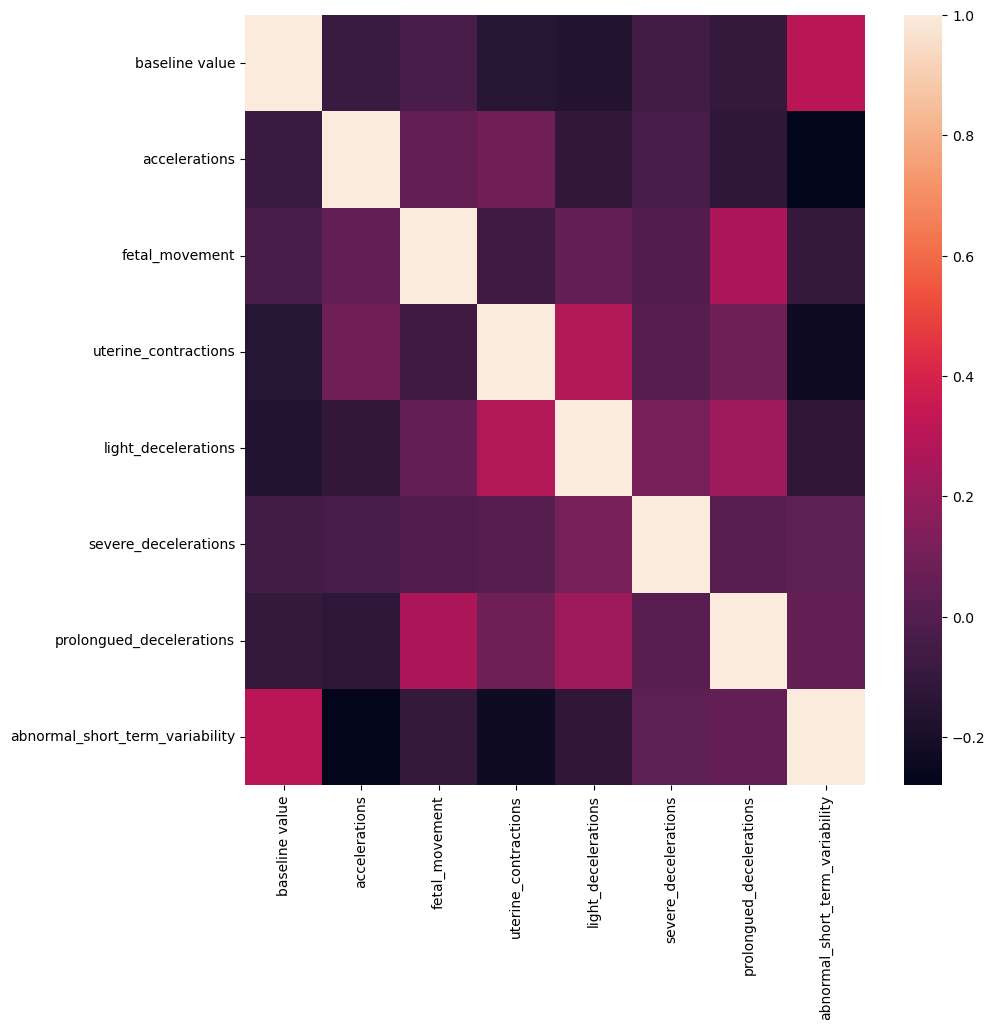

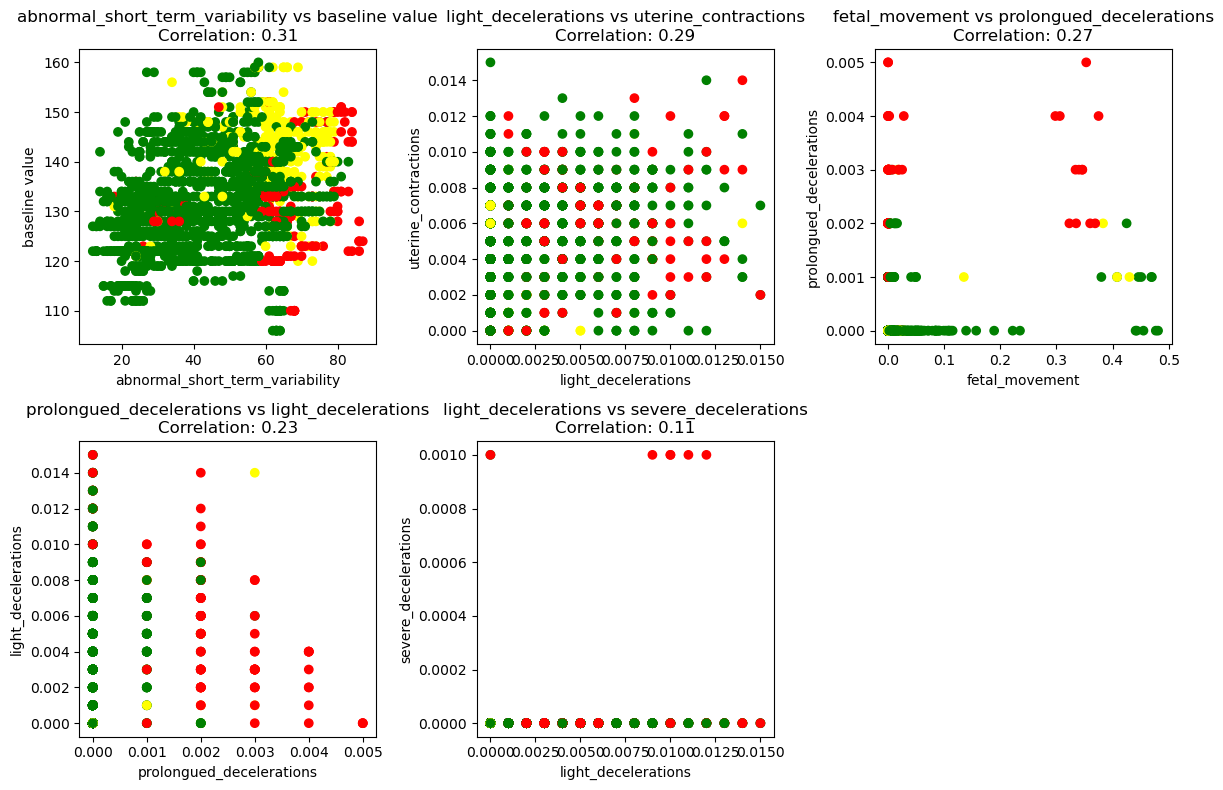

In [16]:
def correlation_heatmap(a):
    correlations = a.corr()
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(correlations)
    plt.show()

    # Identificare le feature con la correlazione più alta 
    highest_correlations = correlations.unstack().sort_values(ascending=False) 
    # Rimuovere le correlazioni tra la stessa feature
    highest_correlations = highest_correlations[highest_correlations.index.get_level_values(0) != highest_correlations.index.get_level_values(1)]
    # Prendere le 5 coppie con la correlazione più alta, selezionando in modo alternato
    top_5_correlations = highest_correlations[::2][:5]


    num_plots = len(top_5_correlations)
    num_rows = (num_plots + 2) // 3  # Calcola il numero di righe dei subplot
    num_cols = min(num_plots, 3)  # Calcola il numero di colonne dei subplot

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
    axes = axes.flatten()

    for i, (feature_pair, correlation) in enumerate(top_5_correlations.iteritems()):
        feature1, feature2 = feature_pair
        ax = axes[i]
        colors = y.map(label_colors)
        ax.scatter(a[feature1], a[feature2], c=colors)
        ax.set_xlabel(feature1)
        ax.set_ylabel(feature2)
        ax.set_title(f"{feature1} vs {feature2}\nCorrelation: {correlation:.2f}")

   # Rimuove gli assi vuoti se necessario
    if num_plots < len(axes):
        for j in range(num_plots, len(axes)):
            fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

correlation_heatmap(X)


#### Si mostra come i dati ora rientrino tutti in una stessa scala rispettando i loro valori sottraendo la media (μ) da ogni valore (x) del vettore e dividere la differenza per la devianza standard (σ)

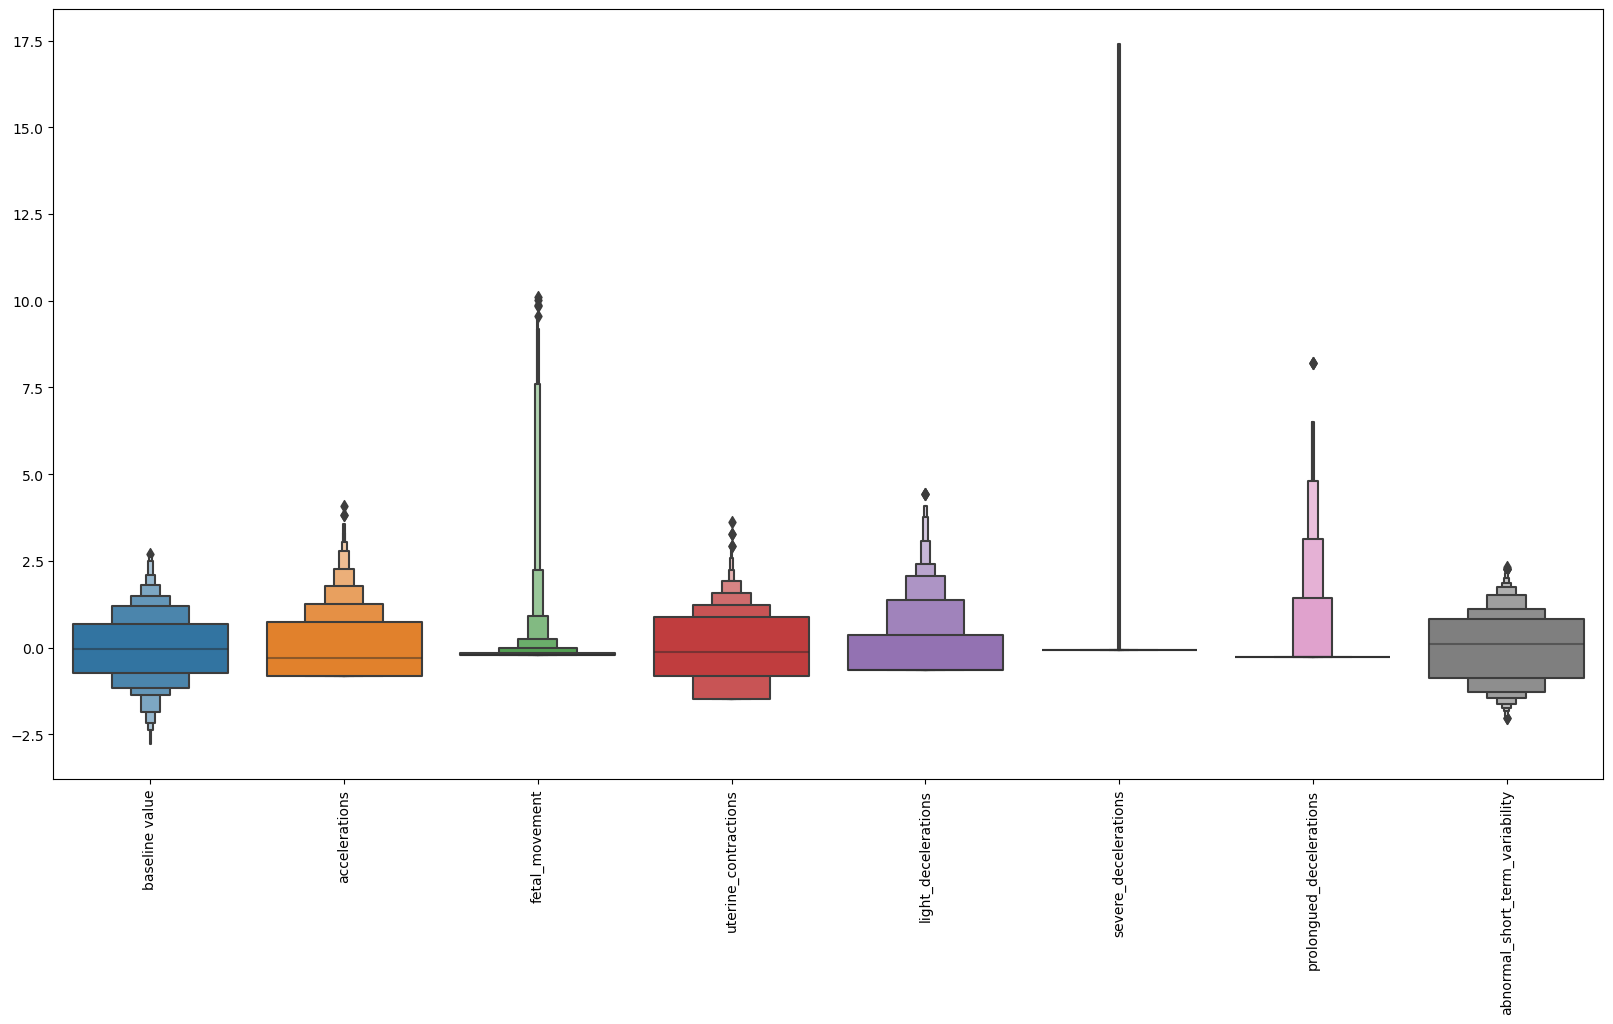

In [17]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_def)
plt.xticks(rotation=90)
plt.show()

### Ensambling Model - Weak Model 

#### L'utilizzo del metodo di ensemble con queste diverse tecniche ci permette di ottenere una previsione più accurata e stabile, combinando le capacità dei diversi modelli. Inoltre, ci consente di gestire una maggiore varietà di scenari e migliorare la capacità di generalizzazione del nostro modello.

#### In conclusione, l'ensemble di Random Forest, Regressione Logistica e SVM, utilizzando sia la tecnica Hard che Soft, ci offrono un approccio robusto e flessibile per l'analisi dei dati e la previsione delle classi, sfruttando i vantaggi distinti offerti da ciascun modello.

In [18]:
log = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
rnd = RandomForestClassifier(n_estimators=100, random_state=42)
svc = SVC(gamma='scale', probability=True, random_state=42)

# Modello di Hard Voting
voting_hard = VotingClassifier(
    estimators=[('lr', log), ('rf', rnd), ('svc', svc)],
    voting='hard'
)

# Modello di Soft Voting
voting_soft = VotingClassifier(
    estimators=[('lr', log), ('rf', rnd), ('svc', svc)],
    voting='soft'
)

# Addestro i modelli
voting_hard.fit(X_train, y_train)
voting_soft.fit(X_train, y_train)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [19]:
# Hard Voting

In [20]:
for clf in (log,rnd,svc, voting_hard):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8708920187793427
RandomForestClassifier 0.9131455399061033
SVC 0.8755868544600939
VotingClassifier 0.8802816901408451


In [21]:
# Soft Voting 

In [22]:
for clf in (log,rnd,svc, voting_soft):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8708920187793427
RandomForestClassifier 0.9131455399061033
SVC 0.8755868544600939
VotingClassifier 0.8826291079812206


###  Modelo Omogeneo - Tuned Model 
#### Li utilizziamo per avere: 
##### - Delle migliori performance: la ricerca di iperparametriaiuta a trovare metriche di valutazione più efficaci 
##### - Riduzione dell'Overfitting: capacità di generalizzazione 
##### - Maggiore flessibilità: caratteristiche appropriate al dataset

### Questo agirà sia per i modelli forti (bagging) con il Random Forest che con modelli di autoapprendimento dalla costruzione debole (Boosting) con XGBoost  
##### La principale differenza tra bagging (Random Forest) e boosting (XGBoost Classifier) è l'approccio di combinazione dei modelli. Mentre il bagging combina modelli in modo indipendente, il boosting crea una sequenza di modelli deboli che si migliorano reciprocamente. Entrambe le tecniche hanno dimostrato di essere efficaci in diversi contesti, ma possono avere prestazioni diverse a seconda del problema e dei dati specifici. 

## Random Forest Classifier: 
#### XGBooster Classifier è utilizzato perché: 
##### - Riduzione dell'overfitting: 
##### - Gestione di dati non bilanciati
##### - Identificazione di importanti feature

In [23]:
# Tune Model - Utilizzo del Random Forest

In [24]:
#Modello 1 - Ottimizzazione=ricerca degli iperparamentri 
rfc_grid = RandomForestClassifier()
params = {
   'n_estimators': [100, 300, 500], #'n_estimators': Il numero di alberi decisionali (estimatori) da utilizzare nell'ensemble.
    'max_depth': [None, 5, 10], #La massima profondità degli alberi decisionali nell'ensemble. Controlla la complessità del modello. Una profondità maggiore può consentire al modello di adattarsi meglio ai dati di addestramento, ma potrebbe aumentare il rischio di overfitting.
    'min_samples_split': [2, 5, 10], #Il numero minimo di campioni richiesti per suddividere un nodo interno dell'albero. Se il numero di campioni in un nodo è inferiore a questo valore, la suddivisione non viene effettuata.
    'min_samples_leaf': [1, 2, 4], #Il numero minimo di campioni richiesti in una foglia dell'albero.
    'max_features': ['auto', 'sqrt', 'log2'] #Può essere impostato come 'auto', 'sqrt' o 'log2'. 'auto' significa che tutte le feature vengono considerate, 'sqrt' indica che la radice quadrata del numero totale di feature viene considerata, 'log2' indica che il logaritmo in base 2 del numero totale di feature viene considerata
}

clf = GridSearchCV(
    estimator=rfc_grid,
    param_grid=params,
    cv=3,
    n_jobs=1,
    verbose=1
)

clf.fit(X_train,y_train)

print("Parametri ottimali:", clf.best_params_)
print("Miglior punteggio:", clf.best_score_)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Parametri ottimali: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Miglior punteggio: 0.9215686274509803


In [25]:
rfc_opt=RandomForestClassifier(max_depth=None,min_samples_split=5,min_samples_leaf=1,max_features='auto', n_estimators=500)
rfc_opt.fit(X_train,y_train)
pred_1_opt=rfc_opt.predict(X_test) 
print(classification_report(y_test, pred_1_opt))

              precision    recall  f1-score   support

         1.0       0.93      0.99      0.96       332
         2.0       0.80      0.61      0.69        59
         3.0       0.90      0.77      0.83        35

    accuracy                           0.92       426
   macro avg       0.88      0.79      0.83       426
weighted avg       0.91      0.92      0.91       426



In [26]:
from sklearn.model_selection import cross_val_predict
rfc_opt = RandomForestClassifier(max_depth=None, min_samples_split=5, min_samples_leaf=1, max_features='sqrt', n_estimators=500)
#validazione incrociata con k-fold
k = 5  # Numero di fold desiderato
pred_1_opt_kf = cross_val_predict(rfc_opt, X_train, y_train, cv=k)
print(classification_report(y_train, pred_1_opt_kf))


              precision    recall  f1-score   support

         1.0       0.94      0.98      0.96       992
         2.0       0.84      0.68      0.75       177
         3.0       0.88      0.78      0.83       106

    accuracy                           0.93      1275
   macro avg       0.89      0.82      0.85      1275
weighted avg       0.92      0.93      0.92      1275



In [27]:
rfc_opt = RandomForestClassifier(max_depth=None, min_samples_split=5, min_samples_leaf=1, max_features='sqrt', n_estimators=500)
rfc_opt.fit(X_train, y_train)
pred_1_opt_cv = rfc_opt.predict(X_cv)
print(classification_report(y_cv, pred_1_opt_cv))

              precision    recall  f1-score   support

         1.0       0.93      0.99      0.96       331
         2.0       0.78      0.59      0.67        59
         3.0       0.87      0.74      0.80        35

    accuracy                           0.91       425
   macro avg       0.86      0.77      0.81       425
weighted avg       0.91      0.91      0.91       425



<AxesSubplot:>

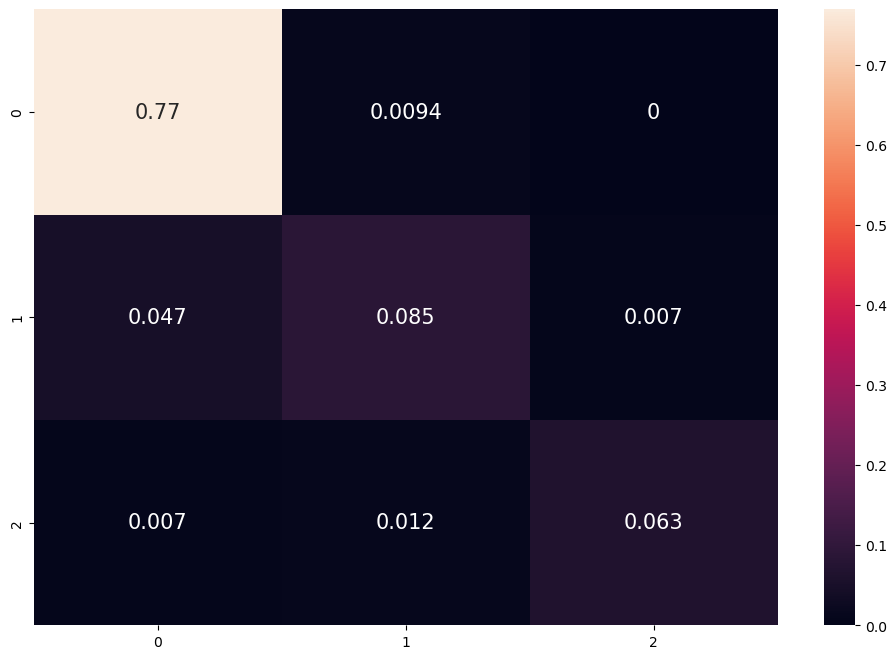

In [28]:
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, pred_1_opt)
sns.heatmap(cf_matrix/np.sum(cf_matrix),annot = True, annot_kws = {'size':15})

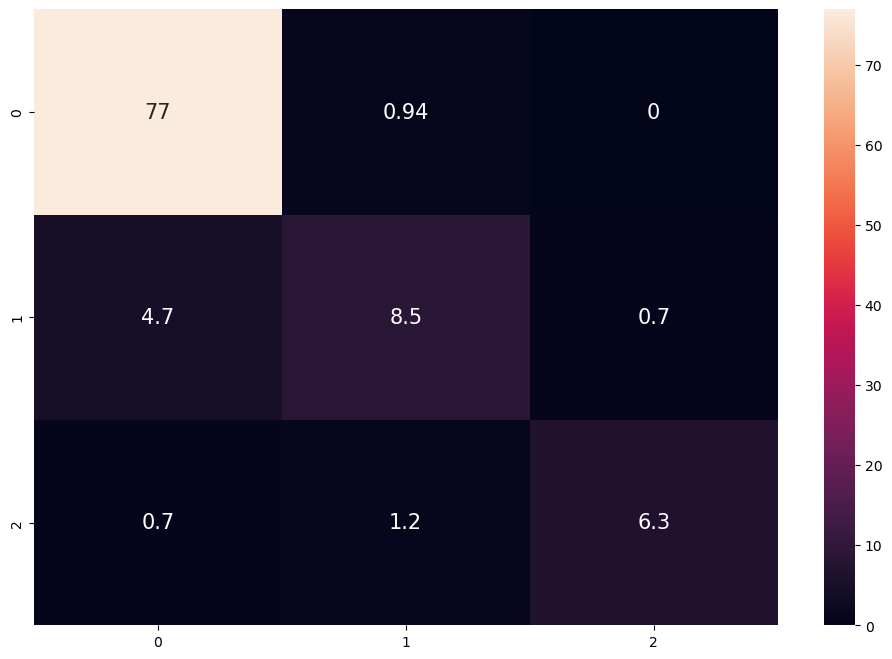

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(12, 8))
cf_matrix = confusion_matrix(y_test, pred_1_opt)
normalized_cf_matrix = cf_matrix / np.sum(cf_matrix)  # Normalizza confusion matrix 
scaled_cf_matrix = normalized_cf_matrix * 100  # Moltiplica per 100 per ottenere i valori in percentuale

sns.heatmap(scaled_cf_matrix, annot=True, annot_kws={'size': 15})
plt.show()


In [30]:
importance = rfc_opt.feature_importances_
indices = np.argsort(importance)
sorted_features = X.columns[indices]
sorted_importance = importance[indices]

In [31]:
sorted_importance

array([0.00509686, 0.0568147 , 0.07335168, 0.12924605, 0.13298134,
       0.13671915, 0.16312317, 0.30266705])

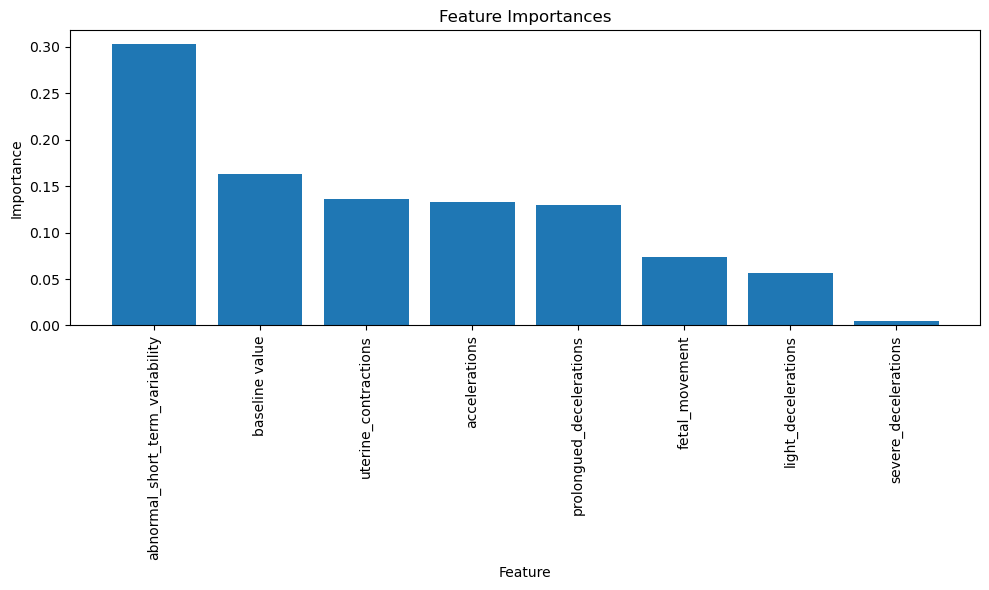

In [32]:
importances = rfc_opt.feature_importances_
feature_names = np.array(X.columns)

# Feature importances in ordine decrescente
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, tick_label=sorted_feature_names)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()


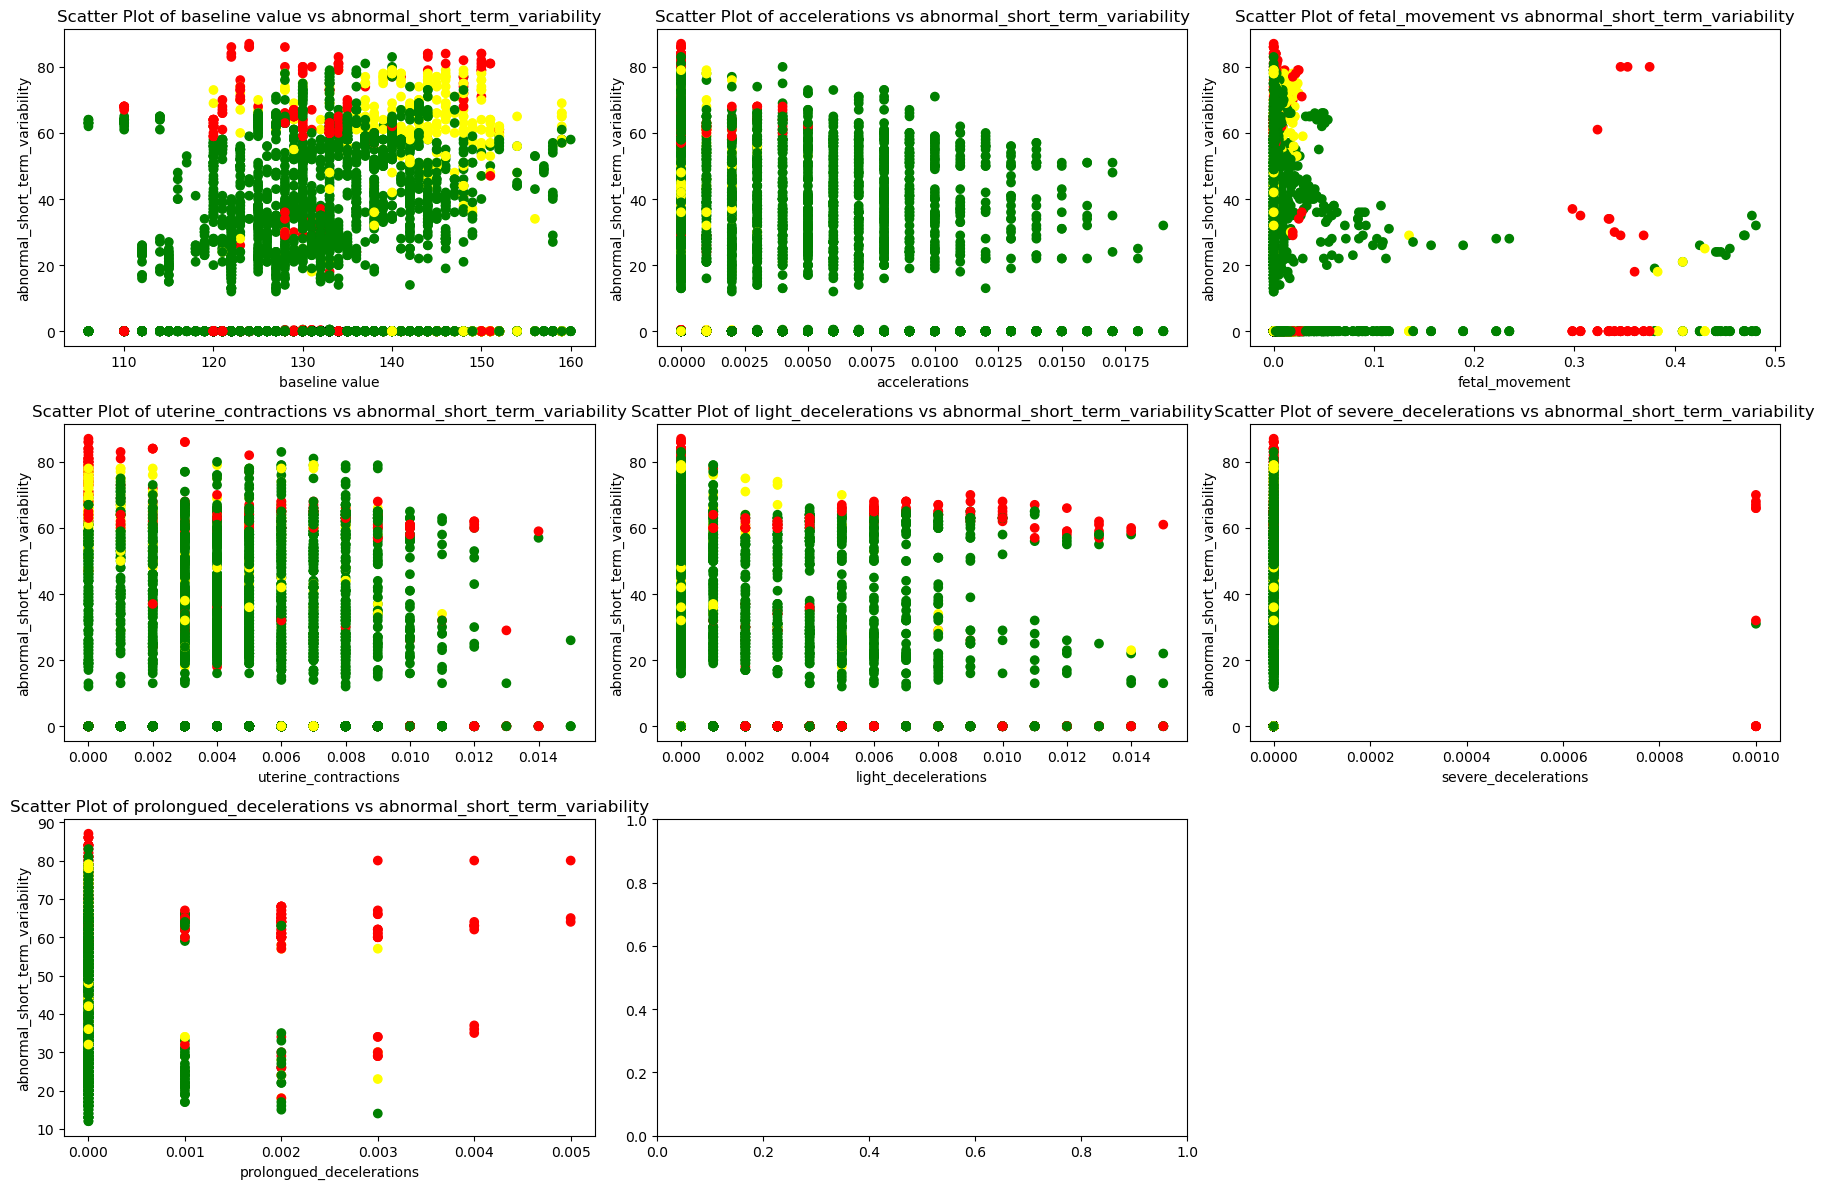

In [33]:
plt.figure(figsize=(18, 12))
num_features = len(X.columns)
num_rows = (num_features - 1) // 3 + 1
colors = y.map(label_colors)

for i in range(num_features):
    plt.subplot(num_rows, 3, i + 1)
    for j in range(i + 1, num_features):
       # scatter_colors = [y[custom_colors] for label in y] 
        plt.scatter(X.iloc[:, i], X.iloc[:, j], c=colors)
        plt.xlabel(X.columns[i])
        plt.ylabel(X.columns[j])
        plt.title("Scatter Plot of {} vs {}".format(X.columns[i], X.columns[j]))

plt.tight_layout()
plt.show()


## XGBooster Classifier: 
#### XGBooster Classifier è utilizzato perché: 
##### - Regolarizza e previene l'overfitting 
##### - Handling dati sbilanciati, ovvero utilizza tecniche di campionamento dando peso alle classi di minoranza nel nostro caso 

In [34]:
X_1=df.drop(["fetal_health",'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency'],axis=1)
y_1=df["fetal_health"]

In [35]:
y_1 = y_1.astype(int)
y_1 = y_1-1 
X_1.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0


In [36]:
columns_name = X_1.columns.tolist()
scaler = StandardScaler()
# Si è considerato di utilizzare il Robust scaler poiché utilizzando RobustScaler, 
#i valori anomali avranno meno impatto sulla trasformazione dei dati, consentendo di preservare 
# meglio la distribuzione relativa e di mantenere un peso preponderante su di essi.
# si è immaginato anche di utilizzare un Min Max poiché essendo dati clinici ci sono delle feature che 
# hanno una correlazione più importante
# Adattamento e trasformazione dei dati con Standard Scaler
X_st_1 = scaler.fit_transform(X_1)

X_def_1 = pd.DataFrame(data = X_st_1, columns= columns_name)
#spliting test and training sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_def_1, y_1, test_size=0.4, random_state=42, stratify=y_1)
X_cv_1, X_test_1, y_cv_1, y_test_1 = train_test_split(X_test_1, y_test_1, test_size=0.5, shuffle=True, stratify=y_test_1, random_state=42)

In [37]:
X_train_1.shape, y_train_1.shape, X_cv_1.shape, y_cv_1.shape, X_test_1.shape, y_test_1.shape,

((1275, 8), (1275,), (425, 8), (425,), (426, 8), (426,))

In [38]:
from xgboost import XGBClassifier
xgb_grid = XGBClassifier()
params = {
   'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000]
}

clf_xgb = GridSearchCV(
    estimator=xgb_grid,
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1
)

clf_xgb.fit(X_train_1,y_train_1)

print("Parametri ottimali:", clf_xgb.best_params_)
print("Miglior punteggio:", clf_xgb.best_score_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Parametri ottimali: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 1000}
Miglior punteggio: 0.9286274509803922


In [39]:
xgb_opt=XGBClassifier(max_depth=7,learning_rate=0.01 ,n_estimators=1000)
xgb_opt.fit(X_train_1,y_train_1)
pred_2_opt=xgb_opt.predict(X_test_1)
print(classification_report(y_test_1, pred_2_opt))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       332
           1       0.74      0.68      0.71        59
           2       0.82      0.77      0.79        35

    accuracy                           0.91       426
   macro avg       0.84      0.81      0.82       426
weighted avg       0.91      0.91      0.91       426



In [40]:
xgb_opt=XGBClassifier(max_depth=7,learning_rate=0.01 ,n_estimators=1000)
xgb_opt.fit(X_train_1,y_train_1)
pred_2_cv=xgb_opt.predict(X_cv_1)
print(classification_report(y_cv_1, pred_2_cv))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       331
           1       0.72      0.64      0.68        59
           2       0.89      0.71      0.79        35

    accuracy                           0.91       425
   macro avg       0.85      0.78      0.81       425
weighted avg       0.90      0.91      0.90       425



<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

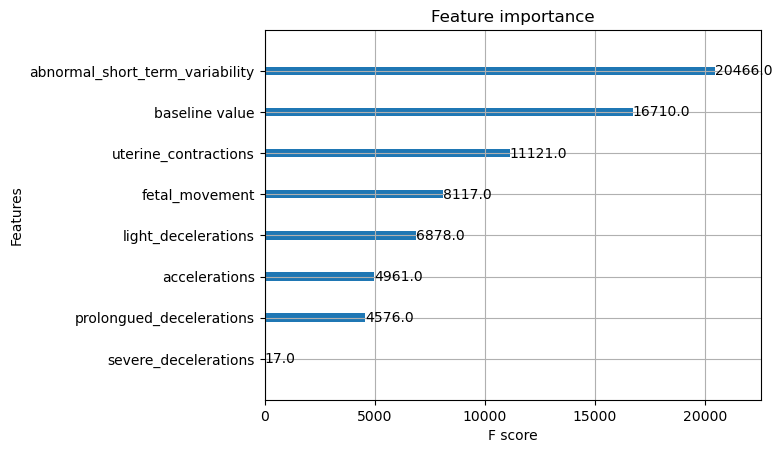

In [41]:
from xgboost import plot_importance
plot_importance(xgb_opt,importance_type='weight')


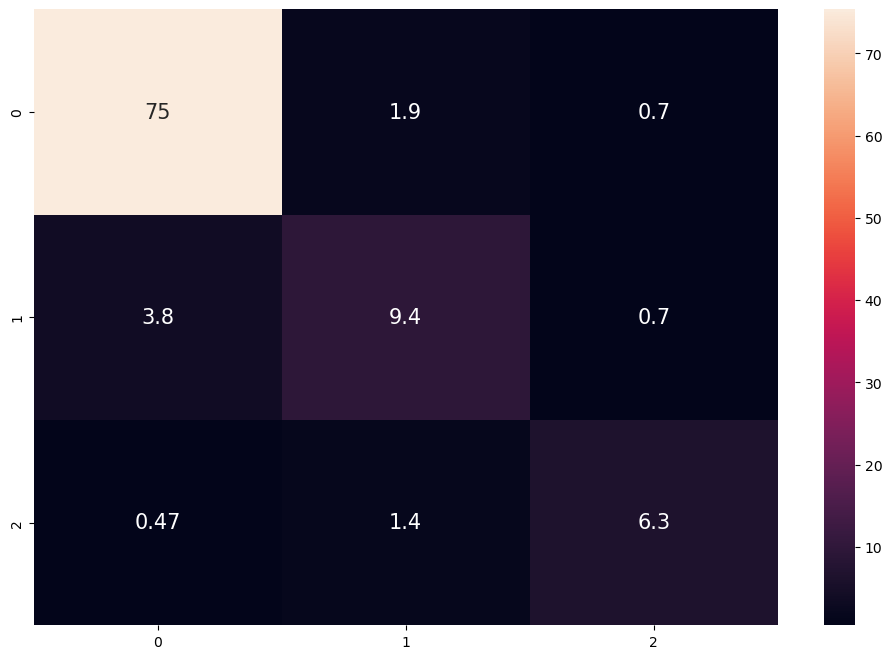

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(12, 8))
cf_matrix = confusion_matrix(y_test_1, pred_2_opt)
normalized_cf_matrix = cf_matrix / np.sum(cf_matrix)  # Normalizza confusion matrix 
scaled_cf_matrix = normalized_cf_matrix * 100  # Moltiplica per 100 per ottenere i valori in percentuale

sns.heatmap(scaled_cf_matrix, annot=True, annot_kws={'size': 15})
plt.show()


### Implementazione con DF completo

In [45]:
X_tot=df.drop(["fetal_health"],axis=1)
y_tot=df["fetal_health"]
columns_name = X_tot.columns.tolist()
X_tot = X_tot.drop(1000)
y_tot = y_tot.drop(1000)
X_tot.head()
X_tot

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,7.2,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,7.1,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,6.1,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,7.0,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0


In [46]:
scaler = StandardScaler()

X_st_ = scaler.fit_transform(X_tot)

X_def_ = pd.DataFrame(data = X_st_, columns= columns_name)

X_train_tot, X_test_val, y_train_tot, y_test_val = train_test_split(X_def_, y_tot, test_size=0.4, random_state=42, stratify=y_tot)
X_cv_tot, X_test_tot, y_cv_tot, y_test_tot = train_test_split(X_test_val, y_test_val, test_size=0.5, shuffle=True, stratify=y_test_val, random_state=0)


In [47]:
print(X_train_tot.shape)
print(y_train_tot.shape)
print(X_cv_tot.shape)
print(y_cv_tot.shape)
print(X_test_tot.shape)
print(y_test_tot.shape)

(1275, 21)
(1275,)
(425, 21)
(425,)
(425, 21)
(425,)


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
log = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
rnd = RandomForestClassifier(n_estimators=100, random_state=42)
svc = SVC(gamma='scale', random_state=42)

voting = VotingClassifier(
    estimators=[('lr', log), ('rd', rnd), ('svc', svc)],
    voting='hard')

In [49]:
voting.fit(X_train_tot, y_train_tot)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42)),
                             ('rd', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [50]:
from sklearn.metrics import accuracy_score

for clf in (log, rnd, svc, voting):
    clf.fit(X_train_tot, y_train_tot)
    y_pred_toth = clf.predict(X_cv_tot)
    print(clf.__class__.__name__, accuracy_score(y_test_tot, y_pred_toth))


LogisticRegression 0.6447058823529411
RandomForestClassifier 0.6588235294117647
SVC 0.6517647058823529
VotingClassifier 0.6564705882352941


In [51]:
voting_soft = VotingClassifier(
    estimators=[('lr', log), ('rd', rnd), ('svc', svc)],
    voting='soft')


In [52]:
voting_soft.fit(X_train_tot, y_train_tot)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42)),
                             ('rd', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))],
                 voting='soft')

In [53]:
rfc_grid = RandomForestClassifier()
params = {
   'n_estimators': [100, 300, 500], 
    'max_depth': [None, 5, 10], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4] 
   # 'max_features': ['auto', 'sqrt', 'log2'] 
}

clf = GridSearchCV(
    estimator=rfc_grid,
    param_grid=params,
    cv=3,
    n_jobs=1,
    verbose=1
)

clf.fit(X_train_tot,y_train_tot)

print("Parametri ottimali:", clf.best_params_)
print("Miglior punteggio:", clf.best_score_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Parametri ottimali: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Miglior punteggio: 0.9356862745098039


In [54]:
rfc_opt=RandomForestClassifier(max_depth= None ,min_samples_split=2,min_samples_leaf=1,max_features='auto', n_estimators=300)
rfc_opt.fit(X_train_tot,y_train_tot)
pred_3_opt=rfc_opt.predict(X_test_tot)
print(classification_report(y_test_tot, pred_3_opt))

              precision    recall  f1-score   support

         1.0       0.95      0.98      0.96       331
         2.0       0.79      0.69      0.74        59
         3.0       0.87      0.77      0.82        35

    accuracy                           0.92       425
   macro avg       0.87      0.82      0.84       425
weighted avg       0.92      0.92      0.92       425



In [55]:
rfc_opt=RandomForestClassifier(max_depth= None ,min_samples_split=2,min_samples_leaf=1,max_features='auto', n_estimators=300)
rfc_opt.fit(X_train_tot,y_train_tot)
pred_3_cv=rfc_opt.predict(X_cv_tot)
print(classification_report(y_cv_tot, pred_3_cv))

              precision    recall  f1-score   support

         1.0       0.95      0.99      0.97       331
         2.0       0.91      0.71      0.80        59
         3.0       0.97      0.91      0.94        35

    accuracy                           0.95       425
   macro avg       0.94      0.87      0.90       425
weighted avg       0.94      0.95      0.94       425



## XGBoost Classifier
### su df completo

In [56]:
X_tot_=df.drop(["fetal_health"],axis=1)
y_tot_=df["fetal_health"]

In [57]:
y_tot_ = y_tot_ - 1
y_tot_ = y_tot_.astype(int)
X_tot_.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0


In [58]:
y_tot_

0       1
1       0
2       0
3       0
4       0
       ..
2121    1
2122    1
2123    1
2124    1
2125    0
Name: fetal_health, Length: 2126, dtype: int64

In [59]:
columns_name = X_tot_.columns.tolist()
scaler = StandardScaler()
X_st_xgb = scaler.fit_transform(X_tot_)

X_def_xgb = pd.DataFrame(data = X_st_xgb, columns= columns_name)
X_train_tot_, X_test_tot_, y_train_tot_, y_test_tot_ = train_test_split(X_def_xgb, y_tot_, test_size=0.4, random_state=42, stratify=y_tot_)
X_cv_tot_, X_test_tot_, y_cv_tot_, y_test_tot_ = train_test_split(X_test_tot_, y_test_tot_, test_size=0.5, shuffle=True, stratify=y_test_tot_, random_state=42)

In [60]:
y_test_tot_

1783    0
399     1
425     0
1920    0
661     1
       ..
961     0
2044    0
750     2
252     0
192     1
Name: fetal_health, Length: 426, dtype: int64

In [61]:
xgb_opt=XGBClassifier(max_depth=3,learning_rate=0.01 ,n_estimators=500)
xgb_opt.fit(X_train_tot_,y_train_tot_)
pred_4_opt=xgb_opt.predict(X_test_tot_)
print(classification_report(y_test_tot_, pred_4_opt))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       332
           1       0.89      0.68      0.77        59
           2       0.91      0.91      0.91        35

    accuracy                           0.93       426
   macro avg       0.91      0.86      0.88       426
weighted avg       0.93      0.93      0.93       426



In [62]:
xgb_opt=XGBClassifier(max_depth=3,learning_rate=0.01 ,n_estimators=500)
xgb_opt.fit(X_train_tot_,y_train_tot_)
pred_4_cv=xgb_opt.predict(X_cv_tot_)
print(classification_report(y_cv_tot_, pred_4_cv))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       331
           1       0.83      0.68      0.75        59
           2       0.94      0.94      0.94        35

    accuracy                           0.93       425
   macro avg       0.91      0.87      0.88       425
weighted avg       0.93      0.93      0.93       425



## Balanced DF + Feature selection + Tuned Random Forest Classifier: 
#### SMOTE: perché le etichette sono molto sbilanciate
##### -Feature Selection: perché possiamo prendere in considerazione ANOVA ovvero l'indice di correlazione e prendere solo un campione di feature migliori  

In [ ]:
from imblearn.over_sampling import SMOTE
# Feature selection
df_fs= pd.read_csv('fetal_health.csv') 
df_fs = df_fs.drop(1000)
pd.set_option('display.max_columns', None)
X=df_fs.drop('fetal_health',axis=1)
y=df_fs['fetal_health']
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X, y, train_size = 0.70, stratify=y, shuffle=True, random_state=42)
best_ft, X_train_fs, X_test_fs = feature_selection(8, X_train_fs, y_train_fs, X_test_fs)

#Smote
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_fs, y_train_fs)

# Random Forest Classifier con GridSearchCV
rfc = RandomForestClassifier()
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'n_estimators': [100, 200, 300]
}
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train_balanced, y_train_balanced)
best_rfc = grid_search.best_estimator_

# Voting Classifier
voting_clf = VotingClassifier(estimators=[('rfc', best_rfc)], voting='hard')

# Cross-validation
k = 5
skf = k
accuracy_scores = []
for train_index, val_index in skf.split(X_train_balanced, y_train_balanced):
    X_train_fold, X_val_fold = X_train_balanced[train_index], X_train_balanced[val_index]
    y_train_fold, y_val_fold = y_train_balanced[train_index], y_train_balanced[val_index]
    voting_clf.fit(X_train_fold, y_train_fold)
    accuracy_scores.append(voting_clf.score(X_val_fold, y_val_fold))

# Plot dei risultati
plt.plot(range(1, k+1), accuracy_scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy su ogni fold')
plt.show()

# Classification report
y_pred_test = voting_clf.predict(X_test_fs)
classification_rep = classification_report(y_test_fs, y_pred_test)
print(classification_rep)
